# Let's go through the entire pipeline.

## 1. Camera Calibration

These are the main steps for camera calibration

1.1 Distortion correction

a. Find corners

b. (Draw corners)

c. Find objpoints and imgpoints (see https://github.com/udacity/CarND-Camera-Calibration/blob/master/camera_calibration.ipynb)

d. calibrate camera and undistort

1.2 Perspective Transform

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
import glob

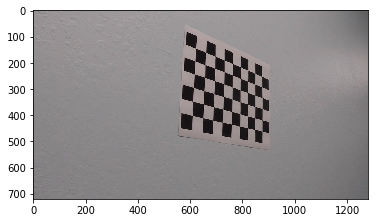

In [2]:
# Read image
camera_cal_path = "camera_cal/"
fnames = os.listdir(camera_cal_path)
idx = 4
fname = fnames[idx]
img = cv2.imread(os.path.join(camera_cal_path, fname))
plt.imshow(img)

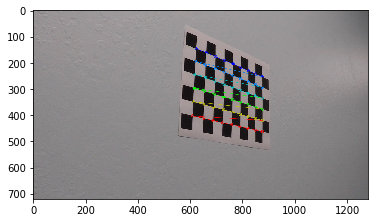

In [3]:
# Find corners
nx = 9  # according to project instructions
ny = 6
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Convert to grayscale

ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None) # Find the chessboard corners

if ret == True:
    cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
    plt.imshow(img)

In [11]:
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    img_size = (img.shape[1], img.shape[0])
    print(img_size)
    #assert img_size == (1280, 720)  # all images are of this size
# there are two images of size (1281, 721)

(1280, 720)
(1280, 720)
(1280, 720)
(1280, 720)
(1280, 720)
(1280, 720)
(1280, 720)
(1280, 720)
(1280, 720)
(1281, 721)
(1280, 720)
(1280, 720)
(1280, 720)
(1280, 720)
(1280, 720)
(1281, 721)
(1280, 720)
(1280, 720)
(1280, 720)
(1280, 720)


In [12]:
# Find objpoints and imgpoints 
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
# %matplotlib inline

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((ny*nx,3), np.float32)
objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
# f = plt.figure()
# f.tight_layout()
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)

    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
        # Not necessary to Draw and display the corners
        cv2.drawChessboardCorners(img, (nx,ny), corners, ret)

In [13]:
# Calibrate camera and save important information as pickle objects
img_size = (1280, 720)
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
dist_pickle = dict(objpoints=objpoints, imgpoints=imgpoints, mtx=mtx, dist=dist)
pickle.dump(dist_pickle, open("camera_cal/dist_pickle.p", "wb"))

In [38]:
# Optional step: go through images and undistort image -> save into folder (and visualize undistortion)
# f, axes = plt.subplots(20, 2)
# f.tight_layout()
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    cv2.imwrite(f'{fname[:-4]}_undist.jpg', dst)
#     axes[idx, 0].imshow(img)
#     axes[idx,0].set_title('Original Image', fontsize=30)
#     axes[idx, 1].imshow(dst)
#     axes[idx,1].set_title('Undistorted Image', fontsize=30)

camera_cal/calibration1.jpg


Text(0.5,1,'Undistorted Image')

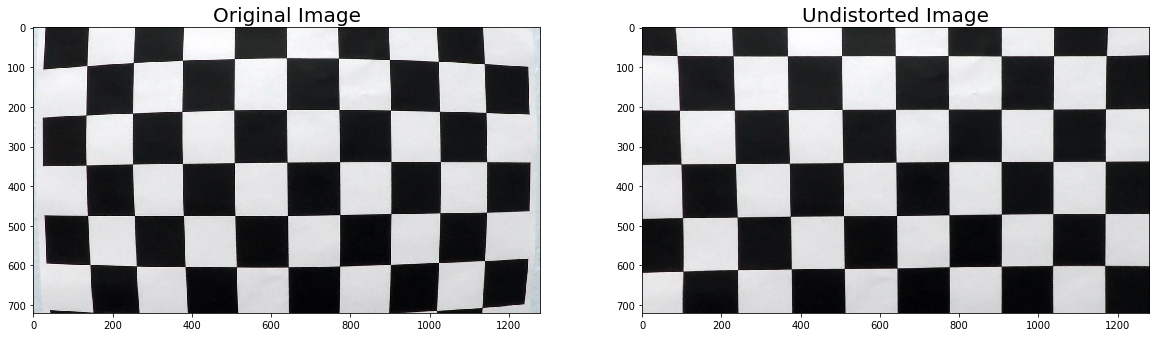

In [63]:
# Manual visualization to check if ok
idx = 19
fname = images[idx]
print(fname)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
img = cv2.imread(fname)
dst = cv2.undistort(img, mtx, dist, None, mtx)
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=20)
ax2.imshow(dst)
ax2.set_title("Undistorted Image", fontsize=20)

In [4]:
# Perspective transform
dist_pickle = pickle.load(open("camera_cal/dist_pickle.p", "rb"))
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]

In [5]:
idx = 0

In [19]:
# Read in an image
images = glob.glob('camera_cal/calibration*.jpg')
idx = 1
fname = images[idx]
img = cv2.imread(fname)
print(img.shape)

# Define a function that takes an image, number of x and y points, 
# camera matrix and distortion coefficients
def corners_unwarp(img, nx, ny, mtx, dist):
    # Use the OpenCV undistort() function to remove distortion
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    # Convert undistorted image to grayscale
    gray = cv2.cvtColor(undist, cv2.COLOR_BGR2GRAY)
    # Search for corners in the grayscaled image
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

    if ret == True:
        # If we found corners, draw them! (just for fun)
        cv2.drawChessboardCorners(undist, (nx, ny), corners, ret)
        # Choose offset from image corners to plot detected corners
        # This should be chosen to present the result at the proper aspect ratio
        # My choice of 100 pixels is not exact, but close enough for our purpose here
        offset = 100 # offset for dst points
        # Grab the image shape
        img_size = (gray.shape[1], gray.shape[0])
#         img_size = (gray.shape[0], gray.shape[1])

        # For source points I'm grabbing the outer four detected corners
        src = np.float32([corners[0], corners[nx-1], corners[-1], corners[-nx]])
#         src = np.float32([corners[0], corners[ny-1], corners[-1], corners[-ny]])
        # For destination points, I'm arbitrarily choosing some points to be
        # a nice fit for displaying our warped result 
        # again, not exact, but close enough for our purposes
        dst = np.float32([[offset, offset], [img_size[0]-offset, offset], 
                                     [img_size[0]-offset, img_size[1]-offset], 
                                     [offset, img_size[1]-offset]])
        # Given src and dst points, calculate the perspective transform matrix
        M = cv2.getPerspectiveTransform(src, dst)
        # Warp the image using OpenCV warpPerspective()
        warped = cv2.warpPerspective(undist, M, img_size)

    # Return the resulting image and matrix
    return warped, M

(720, 1280, 3)


In [14]:
top_down, perspective_M = corners_unwarp(img, nx, ny, mtx, dist)
# top_down, perspective_M = corners_unwarp(img, ny, nx, mtx, dist)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(top_down)
ax2.set_title('Undistorted and Warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

(720, 1280, 3)


UnboundLocalError: local variable 'warped' referenced before assignment

In [21]:
for image in images:
    img = cv2.imread(image)
    print(image)
    try:
        top_down, perspective_M = corners_unwarp(img, nx, ny, mtx, dist)
        cv2.imwrite(f'{image[:-4]}_warped.jpg', top_down)
    except UnboundLocalError:
        print(f"Cannot transform the image: {image}")
        pass

camera_cal/calibration8.jpg
camera_cal/calibration2.jpg
Cannot transform the image: camera_cal/calibration2.jpg
camera_cal/calibration19.jpg
camera_cal/calibration9.jpg
camera_cal/calibration3.jpg
camera_cal/calibration14.jpg
camera_cal/calibration10.jpg
camera_cal/calibration11.jpg
camera_cal/calibration16.jpg
camera_cal/calibration7.jpg
camera_cal/calibration20.jpg
camera_cal/calibration6.jpg
camera_cal/calibration4.jpg
Cannot transform the image: camera_cal/calibration4.jpg
camera_cal/calibration18.jpg
camera_cal/calibration5.jpg
Cannot transform the image: camera_cal/calibration5.jpg
camera_cal/calibration15.jpg
camera_cal/calibration12.jpg
camera_cal/calibration13.jpg
camera_cal/calibration17.jpg
camera_cal/calibration1.jpg
Cannot transform the image: camera_cal/calibration1.jpg


In [ ]:
# ToDo: loop through images and save warped image in folder
# Refactor into function
# Then go through color + gradient thresholding on the test images!

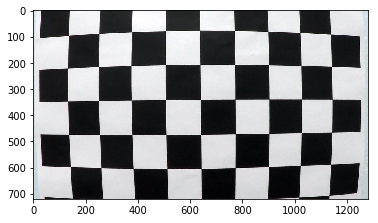

In [115]:
plt.imshow(img)

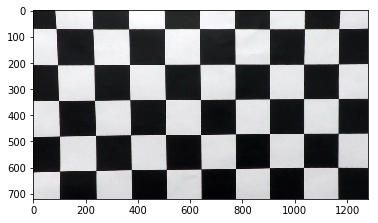

In [116]:
undist = cv2.undistort(img, mtx, dist, None, mtx)
plt.imshow(undist)